# Create and print data frame for all results

In [1]:

import os
import pandas as pd
import numpy as np
import glob
import matplotlib.pyplot as plt

# Assign path
path = '../Stuff/MIL_STRAT'  # path to files
files = glob.glob(path + "/*.csv")
file_count = len(files)

# Create empty list to store dataframes
dataframes_list = []
file_labels = []  # List to store modified file labels

# Append datasets to the list and print corresponding file names and information
for i in range(file_count):
    temp_df = pd.read_csv(files[i])
    temp_df.columns = ['dist_min_Mpc', 'dist_max_Mpc', 'metric', 'found', 'total', 'efficiency']
    dataframes_list.append(temp_df['efficiency'])

    # Get the modified file name for labeling
    file_name = os.path.basename(files[i])
    modified_file_name = file_name.replace("MIL_efficiency_", "").replace("_cadence", "").replace(".csv", "")
    file_labels.append(modified_file_name)

    print("File Name:", modified_file_name)  # Print the file name
    print(temp_df)  # Print the dataframe content
    print("-" * 40)  # Print a separator line

E = np.array(dataframes_list, dtype=object)
X = np.arange(7)

File Name: baseline_v3.0_10yrs
   dist_min_Mpc  dist_max_Mpc                              metric  found  \
0            10          1200     KNePopMetric__blue_color_detect    750   
1            10          1200    KNePopMetric__multi_color_detect   8903   
2            10          1200          KNePopMetric__multi_detect  11080   
3            10          1200      KNePopMetric__red_color_detect    632   
4            10          1200        KNePopMetric__ztfrest_simple   1109   
5            10          1200   KNePopMetric__ztfrest_simple_blue    765   
6            10          1200    KNePopMetric__ztfrest_simple_red    440   

     total  efficiency  
0  1000000    0.000750  
1  1000000    0.008903  
2  1000000    0.011080  
3  1000000    0.000632  
4  1000000    0.001109  
5  1000000    0.000765  
6  1000000    0.000440  
----------------------------------------
File Name: baseline_v3.4_10yrs
   dist_min_Mpc  dist_max_Mpc                              metric  found  \
0           

In [4]:
f = E[10]
print(f)
len(E)


[0.001005 0.009475 0.011403 0.00059 0.001013 0.000746 0.000395]


11

In [5]:
a = dataframes_list[1]
print(a)

0    0.000785
1    0.010017
2    0.012100
3    0.000759
4    0.001298
5    0.000881
6    0.000514
Name: efficiency, dtype: float64


# Print results in order

In [6]:
import os
import pandas as pd
import numpy as np
import glob

# Assign path
path = '../Stuff/MIL_STRAT'  # path to files
files = glob.glob(path + "/*.csv")
file_count = len(files)

# Create an empty DataFrame to store results
results_df = pd.DataFrame(columns=['File Name', 'Highest Efficiency for ztfrest_simple'])

# Process each file
for i in range(file_count):
    temp_df = pd.read_csv(files[i])
    temp_df.columns = ['dist_min_Mpc', 'dist_max_Mpc', 'metric', 'found', 'total', 'efficiency']
    
    # Filter rows where metric is 'ztfrest_simple'
    ztfrest_df = temp_df[temp_df['metric'].str.contains('ztfrest_simple')]
    
    if not ztfrest_df.empty:
        # Find the highest efficiency value for 'ztfrest_simple'
        highest_efficiency = ztfrest_df['efficiency'].max()
        
        # Get the modified file name for labeling
        file_name = os.path.basename(files[i])
        modified_file_name = file_name.replace("MIL_efficiency_", "").replace("_cadence", "").replace(".csv", "")
        
        # Append the result to the DataFrame
        results_df = results_df.append({
            'File Name': modified_file_name,
            'Highest Efficiency for ztfrest_simple': highest_efficiency
        }, ignore_index=True)

# Sort the results DataFrame by 'Highest Efficiency for ztfrest_simple' in descending order
results_df_sorted = results_df.sort_values(by='Highest Efficiency for ztfrest_simple', ascending=False)

# Print the sorted results DataFrame
print(results_df_sorted)

# Save the sorted results to a CSV file
output_file = '../Stuff/sorted_results.csv'
results_df_sorted.to_csv(output_file, index=False)


                           File Name  Highest Efficiency for ztfrest_simple
2                baseline_v3.3_10yrs                               0.001338
1                baseline_v3.4_10yrs                               0.001298
0                baseline_v3.0_10yrs                               0.001109
6           presto_gap4.0_v2.0_10yrs                               0.001035
10    good_seeing_gsw50.0_v2.1_10yrs                               0.001013
5   good_seeing_u_gsw50.0_v2.1_10yrs                               0.001002
8                baseline_v2.1_10yrs                               0.000989
9                baseline_v2.0_10yrs                               0.000926
7       rolling_ns3_rw0.9_v2.0_10yrs                               0.000924
3           presto_gap3.5_v2.0_10yrs                               0.000920
4           presto_gap3.0_v2.0_10yrs                               0.000912


# Histogram for n=1e6 event EFFICIENCIES 


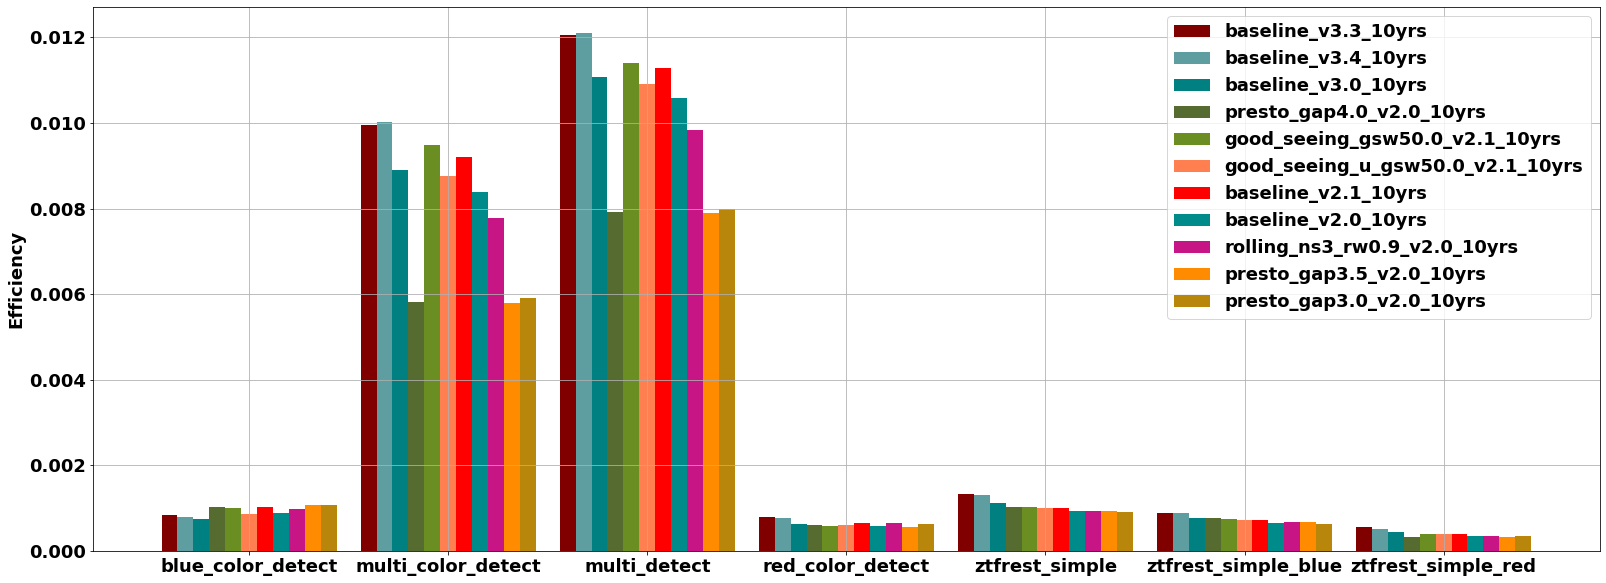

In [53]:
import matplotlib
import os
import pandas as pd
import numpy as np
import glob
import matplotlib.pyplot as plt

font = {'family' : 'normal', 'weight' : 'bold', 'size'   : 18}
matplotlib.rc('font', **font)

w = 0.08  # width of each bar
n_bars = 11  # total number of bars per group

plt.figure(figsize=(27, 10))
plt.bar(X + 0, E[2], label='baseline_v3.3_10yrs', color='maroon', width=w)
plt.bar(X + w, E[1], label='baseline_v3.4_10yrs', color='cadetblue', width=w)
plt.bar(X + 2*w, E[0], label='baseline_v3.0_10yrs', color='teal', width=w)
plt.bar(X + 3*w, E[6], label='presto_gap4.0_v2.0_10yrs', color='darkolivegreen', width=w)
plt.bar(X + 4*w, E[10], label='good_seeing_gsw50.0_v2.1_10yrs', color='olivedrab', width=w)
plt.bar(X + 5*w, E[5], label='good_seeing_u_gsw50.0_v2.1_10yrs', color='coral', width=w)
plt.bar(X + 6*w, E[8], label='baseline_v2.1_10yrs', color='red', width=w)
plt.bar(X + 7*w, E[9], label='baseline_v2.0_10yrs', color='darkcyan', width=w)
plt.bar(X + 8*w, E[7], label='rolling_ns3_rw0.9_v2.0_10yrs', color='mediumvioletred', width=w)
plt.bar(X + 9*w, E[3], label='presto_gap3.5_v2.0_10yrs', color='darkorange', width=w)
plt.bar(X + 10*w, E[4], label='presto_gap3.0_v2.0_10yrs', color='darkgoldenrod', width=w)


# plot
kneMetrics = ['blue_color_detect', 'multi_color_detect', 'multi_detect', 'red_color_detect', 'ztfrest_simple', 'ztfrest_simple_blue', 'ztfrest_simple_red']
plt.grid()
plt.xticks(X + (n_bars-1) * w / 2, kneMetrics, fontweight='bold')
plt.ylabel('Efficiency', fontweight='bold')

plt.legend(loc="upper right", fontsize='18', ncol=1)
plt.savefig('MIL_fig4_3.4+newnewnew+2024.png')
plt.savefig('MIL_fig4_3.4+newnewnew+2024.pdf', bbox_inches="tight", format='pdf')  # Save as PDF

plt.show()


# Number of KNe realistic Histogram. 

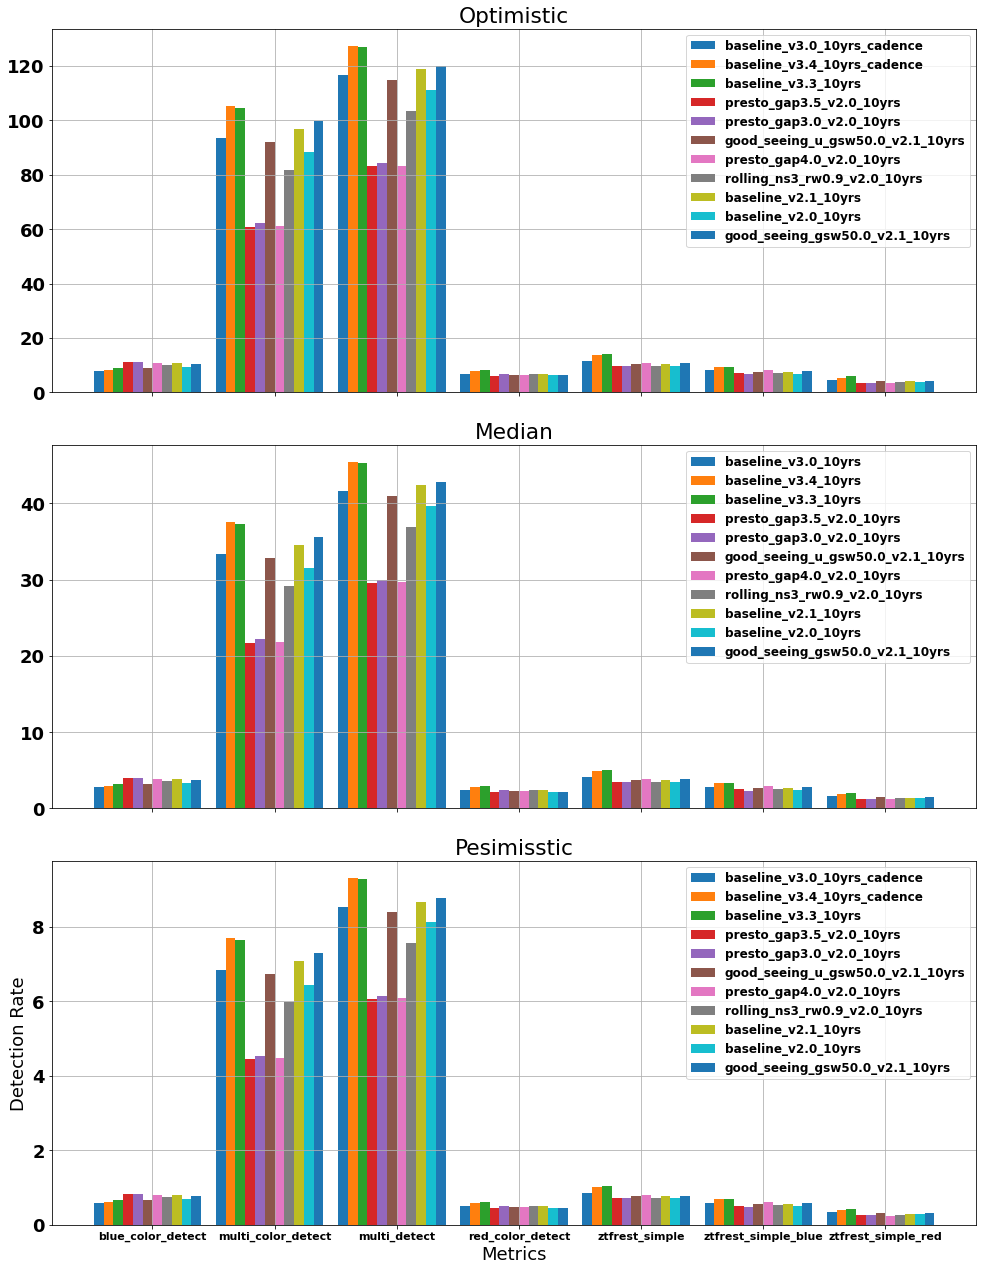

In [56]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Load the data from the CSV files
upper_data = pd.read_csv('realistic_kne_Optimistic.csv')
median_data = pd.read_csv('realistic_kne_Median.csv')
lower_data = pd.read_csv('realistic_kne_Pessimistic.csv')

# Define the metrics to be plotted
kneMetrics = ['blue_color_detect', 'multi_color_detect', 'multi_detect',
           'red_color_detect', 'ztfrest_simple', 'ztfrest_simple_blue', 'ztfrest_simple_red']

# Set up the figure and subplots
fig, axs = plt.subplots(3, 1, figsize=(14, 18), sharex=True)

# Plot each dataset
for idx, (data, title) in enumerate(zip([upper_data, median_data, lower_data],
                                        ['Optimistic', 'Median', 'Pesimisstic'])):
    # Define the bar width
    bar_width = 0.08
    # Set positions for each group of bars
    positions = np.arange(len(kneMetrics))
    
    for i, cadence in enumerate(data['Cadence']):
        axs[idx].bar(positions + i * bar_width, data[kneMetrics].iloc[i], width=bar_width, label=cadence)
        
    axs[idx].set_xticks(positions + (bar_width * len(data['Cadence'])) / 2)
    axs[idx].set_xticklabels(kneMetrics, fontsize='11', ha='center')
    axs[idx].set_title(f'{title}')
    axs[idx].legend(loc='upper right', fontsize='12')  # Position the legend inside the plot area
    axs[idx].grid(True)  
    
    #axs[idx].text(0.02, 0.95, f'{title}', transform=axs[idx].transAxes,
                  #fontsize=16, fontweight='bold', va='top', ha='left')



# Add common labels and title
plt.xlabel('Metrics')
plt.ylabel('Detection Rate')
plt.tight_layout()
plt.savefig('MIL_KNe_Rates.pdf', bbox_inches="tight", format='pdf')  # Save as PDF
plt.show()

# Show the plot
plt.show()
